# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\acer\Desktop\Internship\Project\Fligh-Price-Prediction\flightprice.csv")
df

,FlightName,Date,Departure time,Arrival Time,From,To,Duration,Stops,Price
0,IndiGo,"Sun, Feb 27, 2022",02:00,04:10,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955"
1,IndiGo,"Sun, Feb 27, 2022",06:30,08:40,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955"
2,Air India,"Sun, Feb 27, 2022",07:00,09:05,New Delhi,Mumbai,02 h 05 m,Non stop,"₹ 5,955"
3,IndiGo,"Sun, Feb 27, 2022",07:15,09:25,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955"
4,SpiceJet,"Sun, Feb 27, 2022",07:20,09:35,New Delhi,Mumbai,02 h 15 m,Non stop,"₹ 5,955"
...,...,...,...,...,...,...,...,...,...
2209,AirAsia,"Sat, Mar 5, 2022",16:15,18:25,New Delhi,Visakhapatnam,02 h 10 m,Non stop,"₹ 5,956"
2210,IndiGo,"Sat, Mar 5, 2022",08:45,17:10,New Delhi,Visakhapatnam,08 h 25 m,1 stop via Mumbai,"₹ 6,443"
2211,Air India,"Sat, Mar 5, 2022",14:30,16:35,New Delhi,Visakhapatnam,02 h 05 m,Non stop,"₹ 7,215"
2212,IndiGo,"Sat, Mar 5, 2022",12:30,18:55,New Delhi,Visakhapatnam,06 h 25 m,1 stop via Bengaluru,"₹ 7,908"


In [3]:
df.shape

(2214, 9)

In [4]:
df.isnull().sum()

FlightName        844
Date                0
Departure time    844
Arrival Time      844
From              844
To                844
Duration          844
Stops             844
Price             844
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

FlightName        0
Date              0
Departure time    0
Arrival Time      0
From              0
To                0
Duration          0
Stops             0
Price             0
dtype: int64

In [7]:
df.shape

(1369, 9)

In [8]:
df.head()

,FlightName,Date,Departure time,Arrival Time,From,To,Duration,Stops,Price
0,IndiGo,"Sun, Feb 27, 2022",02:00,04:10,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955"
1,IndiGo,"Sun, Feb 27, 2022",06:30,08:40,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955"
2,Air India,"Sun, Feb 27, 2022",07:00,09:05,New Delhi,Mumbai,02 h 05 m,Non stop,"₹ 5,955"
3,IndiGo,"Sun, Feb 27, 2022",07:15,09:25,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955"
4,SpiceJet,"Sun, Feb 27, 2022",07:20,09:35,New Delhi,Mumbai,02 h 15 m,Non stop,"₹ 5,955"


# Seperating Catagorical column and the numerical columns

In [9]:
catagory=[]
catagory=df.select_dtypes(include="object").columns

In [10]:
catagory

Index(['FlightName', 'Date', 'Departure time', 'Arrival Time', 'From', 'To',
       'Duration', 'Stops', 'Price'],
      dtype='object')

here we can see that the columns which should be numerical columns are interpreated as categorical columns.

### Treating Date column

seperating the day month and date into different columns:

In [11]:
day=[]
for i in df.Date:
    day.append(i.split(",")[0])

In [12]:
month=[]
for i in df.Date:
    try:
        month.append(i.split(" ")[1])
    except:
        month.append("-")

In [13]:
date=[]
for i in df.Date:
    try:
        date.append(i.split(" ")[2].replace(",",""))
    except:
        date.append("-")

In [14]:
df["Day"]=day
df["Month"]=month
df["Dates"]=date
df.drop(columns={"Date"},inplace=True)

In [15]:
df.head()

,FlightName,Departure time,Arrival Time,From,To,Duration,Stops,Price,Day,Month,Dates
0,IndiGo,02:00,04:10,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955",Sun,Feb,27
1,IndiGo,06:30,08:40,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955",Sun,Feb,27
2,Air India,07:00,09:05,New Delhi,Mumbai,02 h 05 m,Non stop,"₹ 5,955",Sun,Feb,27
3,IndiGo,07:15,09:25,New Delhi,Mumbai,02 h 10 m,Non stop,"₹ 5,955",Sun,Feb,27
4,SpiceJet,07:20,09:35,New Delhi,Mumbai,02 h 15 m,Non stop,"₹ 5,955",Sun,Feb,27


### Treating Duration

Converting the hour and minuites to minuites only.

In [16]:
d=[]
for i in df.Duration:

    h=i.split(" ")[0]
    try:
        m=i.split(" ")[2]
    except:
        m=0
    if h=="-":
        h=0
    d.append(int(h)*60+int(m))

In [17]:
df["Duration(Minuites)"]=d
df.drop(columns={"Duration"},inplace=True)

In [18]:
df.head()

,FlightName,Departure time,Arrival Time,From,To,Stops,Price,Day,Month,Dates,Duration(Minuites)
0,IndiGo,02:00,04:10,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,130
1,IndiGo,06:30,08:40,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,130
2,Air India,07:00,09:05,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,125
3,IndiGo,07:15,09:25,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,130
4,SpiceJet,07:20,09:35,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,135


# Dropping

In [19]:
ind=[]
for i in range(len(df.Day)):
    if df.iloc[i][7] == "-":
        ind.append(i)
    else:
        pass
df=df.drop(df.index[ind])

In [20]:
ind=[]
for i in range(len(df.Day)):
    if df.iloc[i][0] == "-":
        ind.append(i)
    else:
        pass
df=df.drop(df.index[ind])

In [21]:
ind=[]
for i in range(len(df.Day)):
    if df.iloc[i][3] == "-":
        ind.append(i)
    else:
        pass
df=df.drop(df.index[ind])

In [22]:
df.head()

,FlightName,Departure time,Arrival Time,From,To,Stops,Price,Day,Month,Dates,Duration(Minuites)
0,IndiGo,02:00,04:10,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,130
1,IndiGo,06:30,08:40,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,130
2,Air India,07:00,09:05,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,125
3,IndiGo,07:15,09:25,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,130
4,SpiceJet,07:20,09:35,New Delhi,Mumbai,Non stop,"₹ 5,955",Sun,Feb,27,135


### Treating Stops

In [23]:
temp=[]
temp2=[]
st=[]
for i in df.Stops:
    temp.append(i.split(" ")[0])
for i in temp:
    try:
        temp2.append(int(i))
    except:
        temp2.append(i)
for i in temp2:
    if type(i)==int:
        st.append(i)
    else:
        st.append(0)
    

In [24]:
df.drop(columns={"Stops"},inplace=True)
df["Stops"]=st

In [25]:
df.head()

,FlightName,Departure time,Arrival Time,From,To,Price,Day,Month,Dates,Duration(Minuites),Stops
0,IndiGo,02:00,04:10,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,130,0
1,IndiGo,06:30,08:40,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,130,0
2,Air India,07:00,09:05,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,125,0
3,IndiGo,07:15,09:25,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,130,0
4,SpiceJet,07:20,09:35,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,135,0


### Treating Departure time and Arrival Time

In [26]:
t=[]
for i in df["Departure time"]:
    temp3=int(i.split(":")[0])
    if temp3>0 and temp3<=6:
        t.append("Night")
    elif temp3>6 and temp3<=12:
        t.append("Morning")
    elif temp3>12 and temp3<=18:
        t.append("Afternoon")
    else:
        t.append("Evening")

In [27]:
df.drop(columns={"Departure time"},inplace=True)
df["Departure time"]=t

In [28]:
t=[]
for i in df["Arrival Time"]:
    temp3=int(i.split(":")[0])
    if temp3>0 and temp3<=6:
        t.append("Night")
    elif temp3>6 and temp3<=12:
        t.append("Morning")
    elif temp3>12 and temp3<=18:
        t.append("Afternoon")
    else:
        t.append("Evening")

In [29]:
df.drop(columns={"Arrival Time"},inplace=True)
df["Arrival Time"]=t

In [30]:
df.head()

,FlightName,From,To,Price,Day,Month,Dates,Duration(Minuites),Stops,Departure time,Arrival Time
0,IndiGo,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,130,0,Night,Night
1,IndiGo,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,130,0,Night,Morning
2,Air India,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,125,0,Morning,Morning
3,IndiGo,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,130,0,Morning,Morning
4,SpiceJet,New Delhi,Mumbai,"₹ 5,955",Sun,Feb,27,135,0,Morning,Morning


### Treating Price

In [31]:
import re
pr=[]
for i in df.Price:
    tem=re.sub("[^0-9]", "", i)
    pr.append(int(tem))

In [32]:
df.drop(columns={"Price"},inplace=True)
df["Price"]=pr

In [33]:
df.head()

,FlightName,From,To,Day,Month,Dates,Duration(Minuites),Stops,Departure time,Arrival Time,Price
0,IndiGo,New Delhi,Mumbai,Sun,Feb,27,130,0,Night,Night,5955
1,IndiGo,New Delhi,Mumbai,Sun,Feb,27,130,0,Night,Morning,5955
2,Air India,New Delhi,Mumbai,Sun,Feb,27,125,0,Morning,Morning,5955
3,IndiGo,New Delhi,Mumbai,Sun,Feb,27,130,0,Morning,Morning,5955
4,SpiceJet,New Delhi,Mumbai,Sun,Feb,27,135,0,Morning,Morning,5955


# shuffel the dataset

In [34]:
df = df.sample(frac = 1)

In [35]:
df.head()

,FlightName,From,To,Day,Month,Dates,Duration(Minuites),Stops,Departure time,Arrival Time,Price
1285,Air India,New Delhi,Dimapur,Sun,Feb,27,1150,2,Afternoon,Afternoon,24890
1536,Vistara,New Delhi,Hyderabad,Sun,Feb,27,130,0,Morning,Morning,10471
565,Air India,New Delhi,Jaipur,Thu,Mar,3,60,0,Evening,Evening,7268
327,IndiGo,New Delhi,Jammu,Tue,Mar,1,95,0,Afternoon,Afternoon,5850
1151,IndiGo,New Delhi,Kolkata,Tue,Mar,1,310,1,Afternoon,Evening,6443


# Encoding

In [36]:
df["Dates"]=pd.to_numeric(df.Dates)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
objList = df.select_dtypes(include = "object").columns

In [39]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

In [40]:
df.head()

,FlightName,From,To,Day,Month,Dates,Duration(Minuites),Stops,Departure time,Arrival Time,Price
1285,0,1,7,1,0,27,1150,2,0,0,24890
1536,19,1,11,1,0,27,130,0,2,2,10471
565,0,1,14,2,1,3,60,0,1,1,7268
327,10,1,15,3,1,1,95,0,0,0,5850
1151,10,1,16,3,1,1,310,1,0,1,6443


# EDA

## Distplot

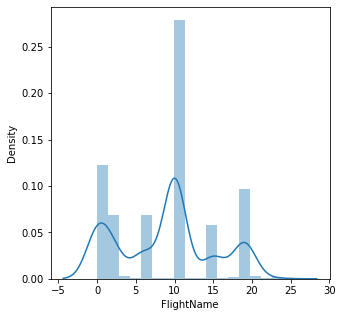

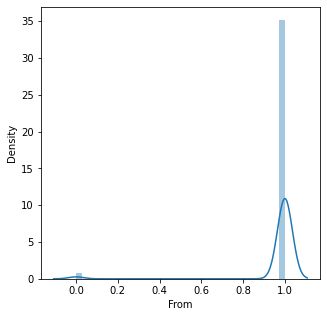

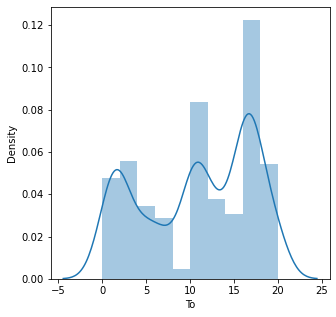

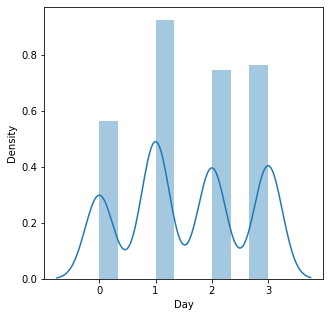

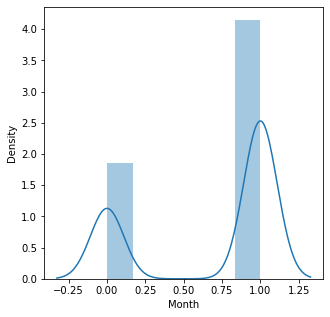

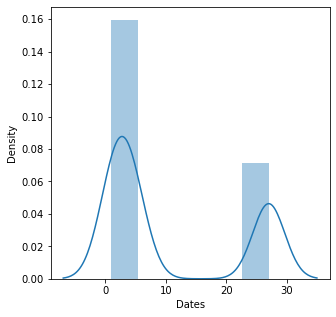

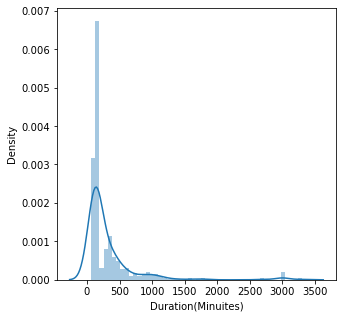

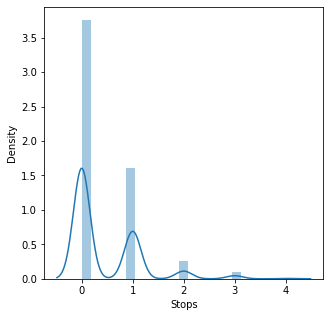

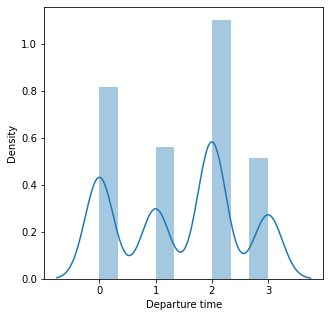

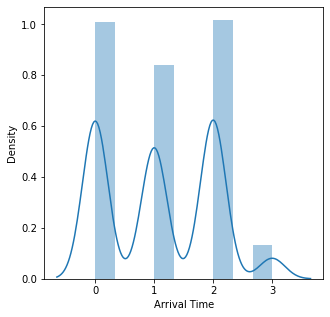

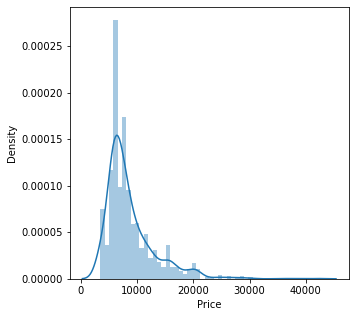

In [41]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

### Boxplot

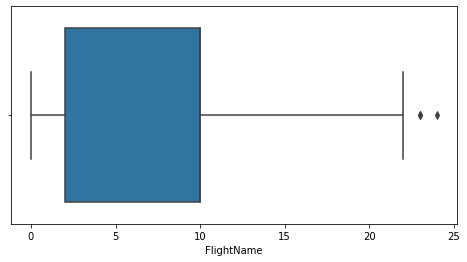

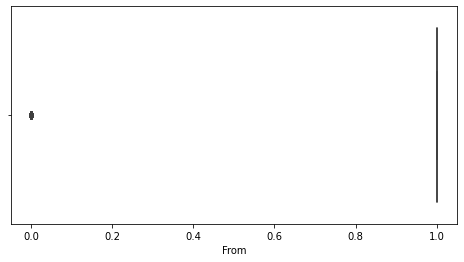

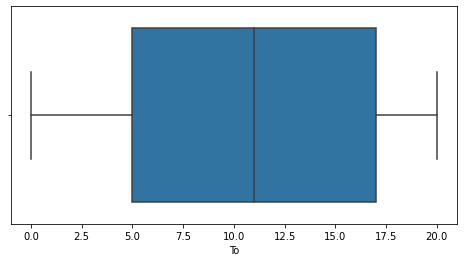

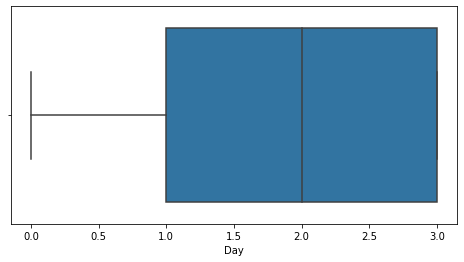

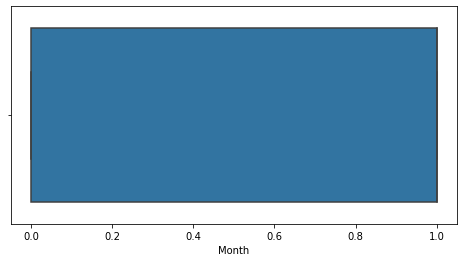

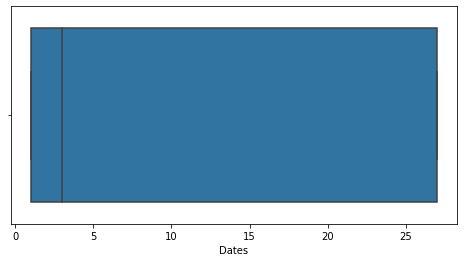

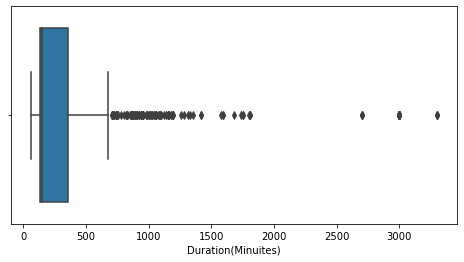

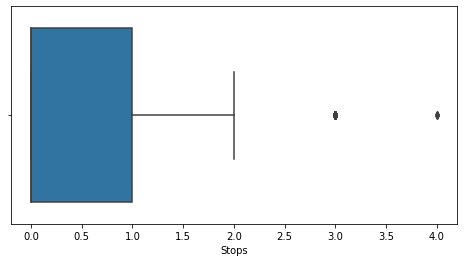

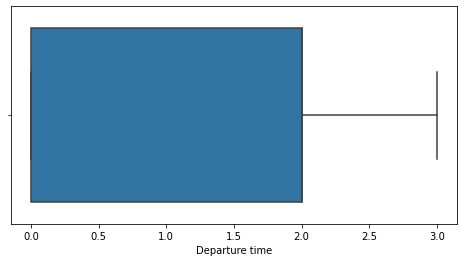

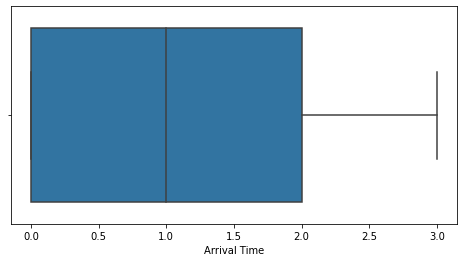

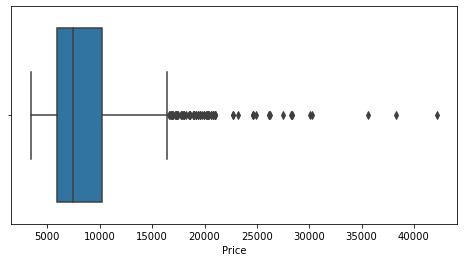

In [42]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

### Pairplot

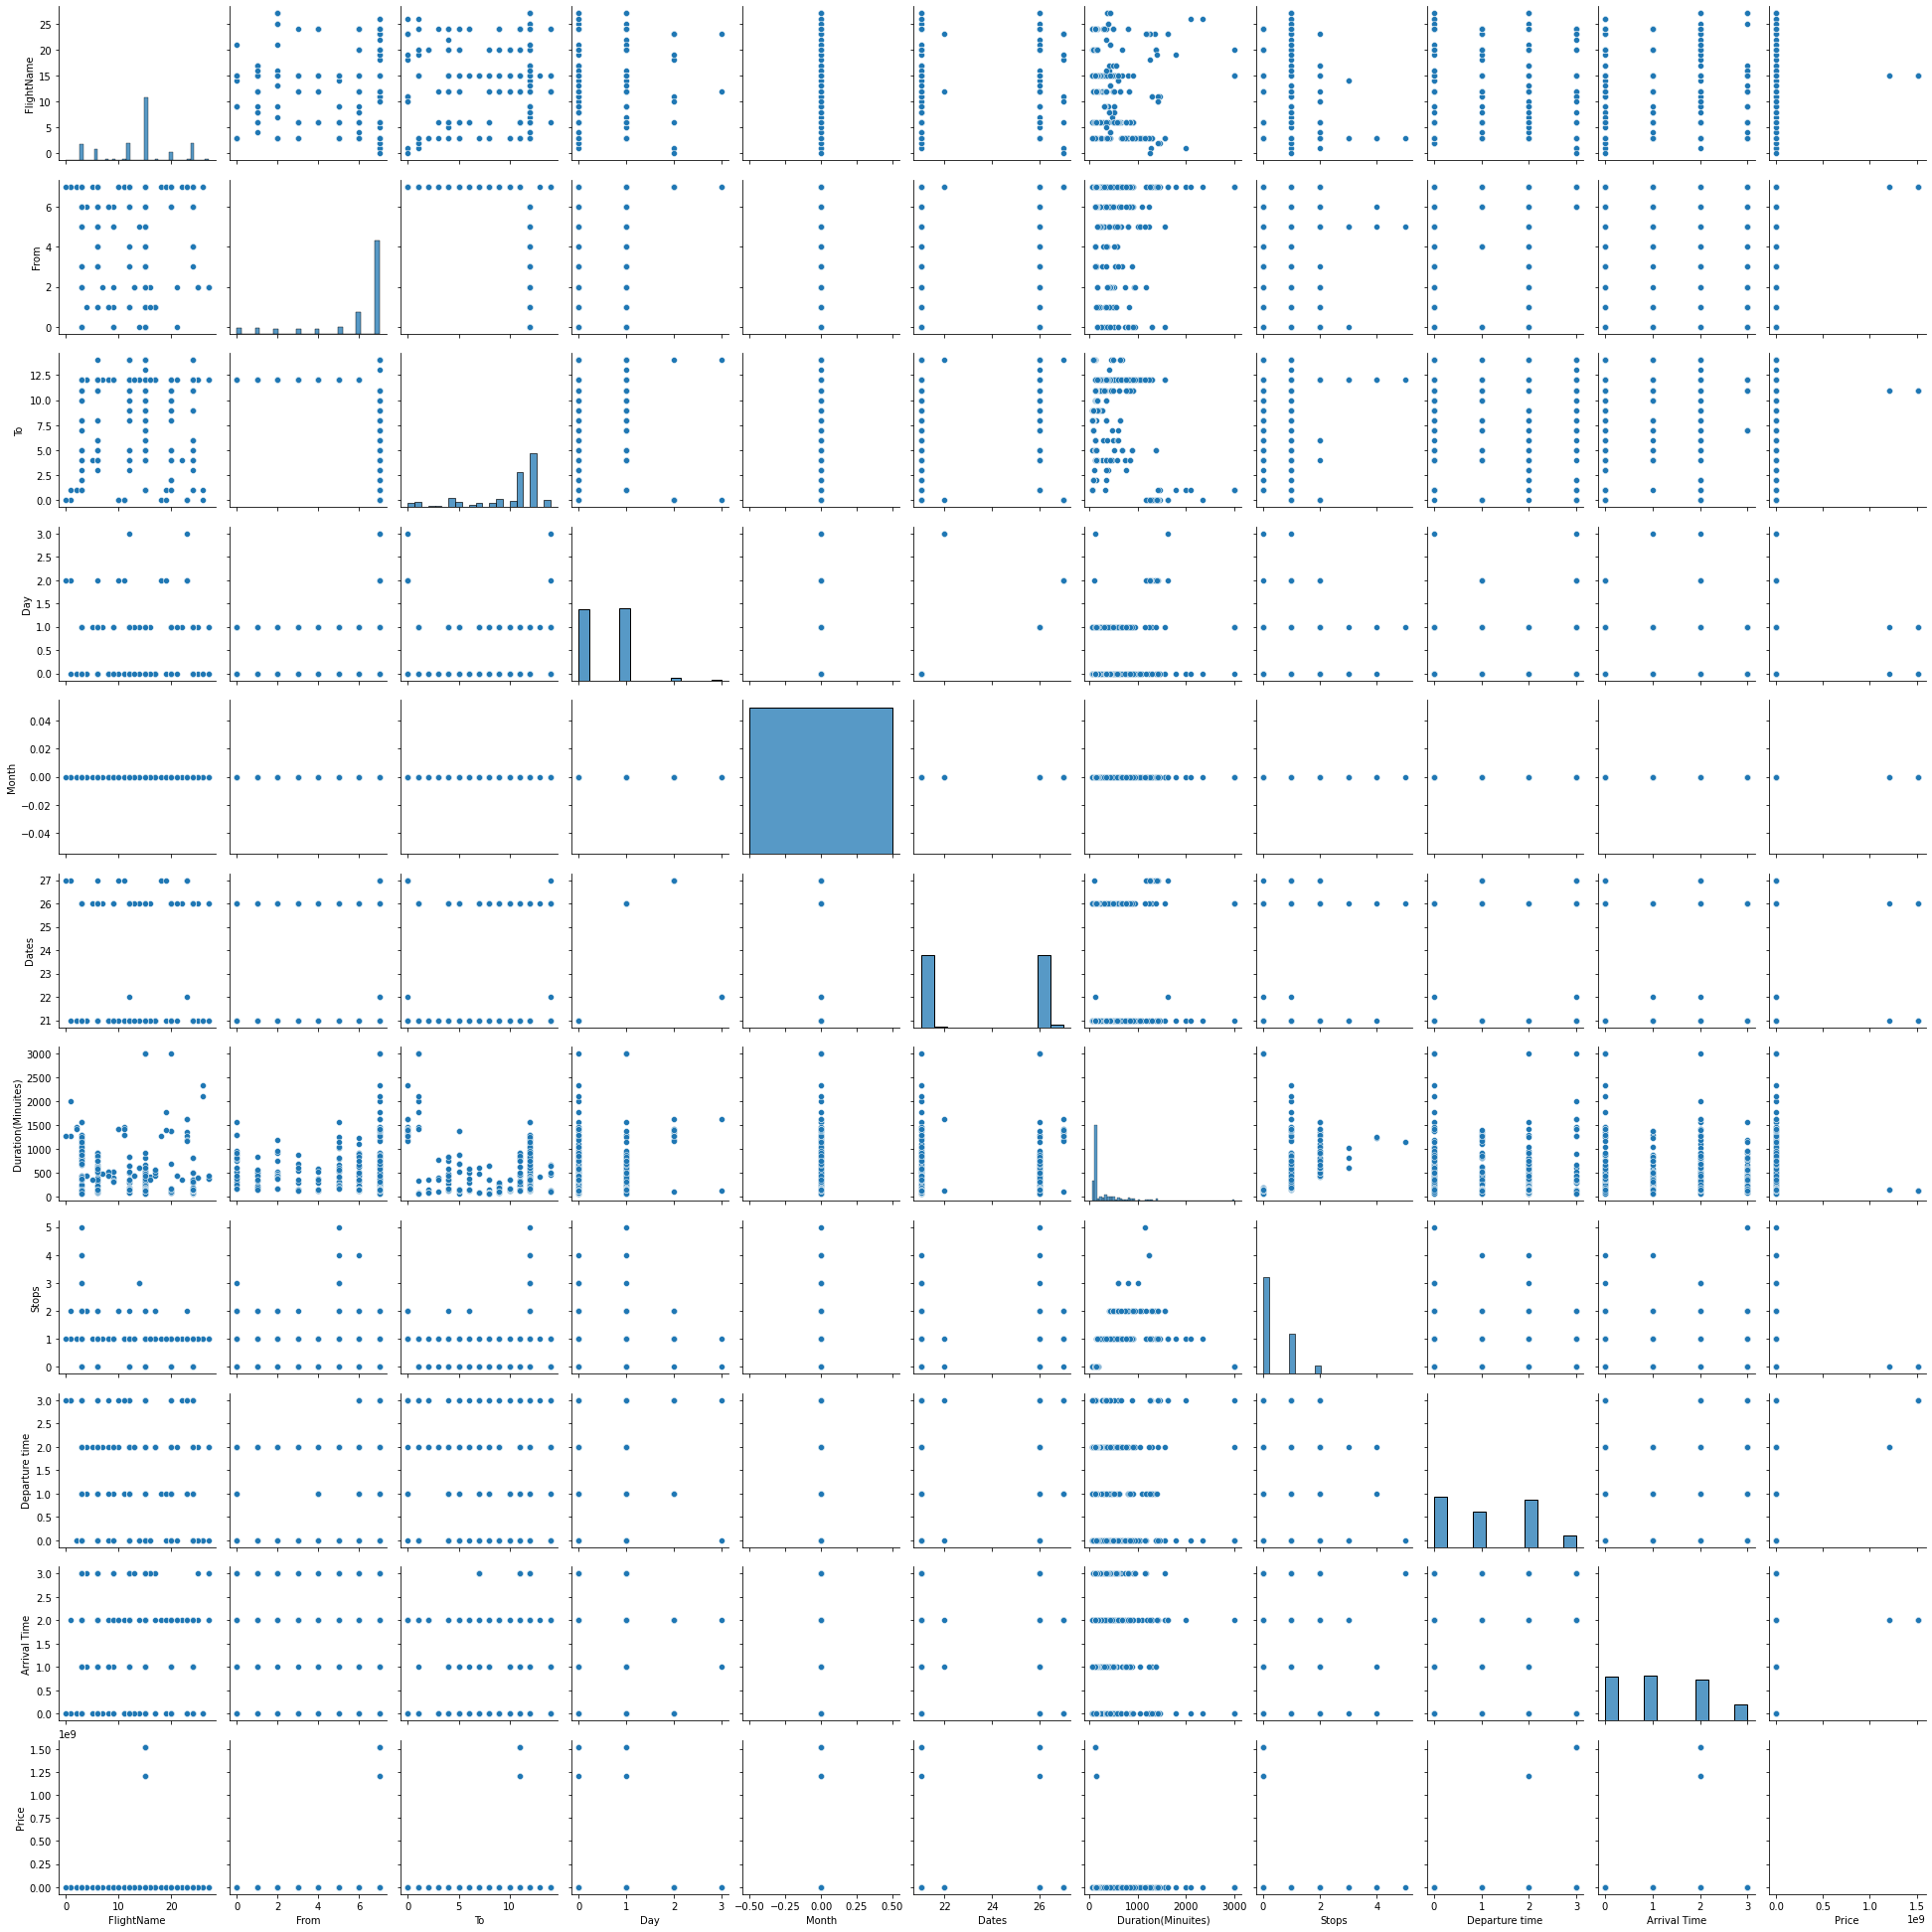

In [49]:
sn.pairplot(df)

### Heatmap

<AxesSubplot:>

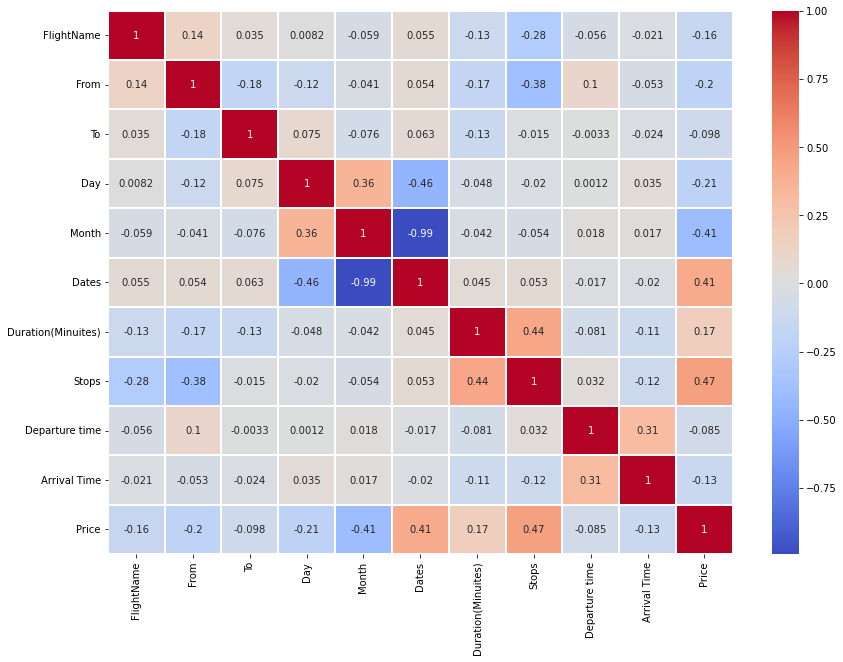

In [43]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

deleting Dates has high correlation with other column.

In [44]:
df.drop(columns={"Dates"},inplace=True)

# Removing Outliers

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [47]:
df.shape

(1280, 10)

# Skewness Removal

In [48]:
df.skew()

FlightName            0.097241
From                  0.000000
To                   -0.357879
Day                  -0.008826
Month                -0.829727
Duration(Minuites)    2.269821
Stops                 1.200874
Departure time       -0.135574
Arrival Time          0.146548
Price                 1.432518
dtype: float64

# Input splitting

In [66]:
x=df.drop(["Price"],axis=1)

In [67]:
y=df["Price"]

# Finding The Best Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [70]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)

In [71]:
#regress function
def regress(model,x,y):
    
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [72]:
LR=LinearRegression()
regress(LR,x,y)

R2: 38.059615695765125
CV Score: 38.86934109722133
Diffrence: 0.8097254014562054


In [73]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 24.02438111398154
CV Score: 48.20265126754023
Diffrence: 24.178270153558692


In [74]:
RDG=Ridge()
regress(RDG,x,y)

R2: 37.994191425961766
CV Score: 38.88781653376859
Diffrence: 0.8936251078068267


In [75]:
LSO=Lasso()
regress(LSO,x,y)

R2: 38.054465230030665
CV Score: 38.87116333359596
Diffrence: 0.8166981035652938


In [76]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 50.17956396734784
CV Score: 67.32845123349266
Diffrence: 17.14888726614482


In [77]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

R2: 29.895815814260818
CV Score: 36.78807261685565
Diffrence: 6.892256802594833


Linear Regressor is our Best Model

# Hyper Parameter Tuning

In [79]:
LR.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [80]:
params = {  'copy_X': [True,False],
 'fit_intercept': [True,False],
 'n_jobs': [1,2,3,4,5,6,7,8,9,10],
 'normalize': [True,False],
 'positive': [True,False]}

In [82]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(LR, params, verbose = 1, cv=3, n_jobs = -1)

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False],
                         'positive': [True, False]},
             verbose=1)

In [84]:
gs.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': False,
 'positive': False}

# Checking Accuracy Score

In [85]:
LR=LinearRegression(
 copy_X= True,
 fit_intercept= True,
 n_jobs= 1,
 normalize= False,
 positive= False)

In [86]:
LR.fit(X_train,Y_train)

LinearRegression(n_jobs=1)

In [87]:
LR.score(X_test,Y_test)

0.38059615695765125

In [88]:
y_test_pred=LR.predict(X_test)

In [89]:
print(LR.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [91]:
import joblib
joblib.dump(LR,r"C:\Users\acer\Desktop\Internship\Project\Fligh-Price-Prediction\flightprice.pkl")

['C:\\Users\\acer\\Desktop\\Internship\\Project\\Fligh-Price-Prediction\\flightprice.pkl']